# Tools

In [198]:
import pandas as pd
import datetime as dt
import missingno as msno  # 視覺化觀察是否有 missing value
pd.options.display.max_columns=None

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load data

> **Data Fields**
>- datetime 
    - hourly date + timestamp  
>- season
    1. spring
    2. summer
    3. fall
    4. winter 
>- holiday 
    - whether the day is considered a holiday
        0. 非假日
        1. 假日
>- workingday 
    - whether the day is neither a weekend nor holiday
        0. 非工作日
        1. 工作日
>- weather 
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
>- temp 
    - temperature in Celsius
>- atemp 
    - "feels like" temperature in Celsius（體感溫度？）
>- humidity 
    - relative humidity
>- windspeed 
    - wind speed
>- casual（非註冊用戶） 
    - number of non-registered user rentals initiated
>- registered（註冊用戶） 
    - number of registered user rentals initiated
>- count（總租借輛數） 
    - number of total rentals
    - count = casual + registered

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sampleSubmission = pd.read_csv('sampleSubmission.csv')

train_df = train.copy()

In [22]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [23]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
sampleSubmission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


# Data preprocessing

## Data types

In [30]:
display(train_df.head())
train_df.dtypes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [31]:
train_df.datetime = pd.to_datetime(train_df.datetime, format='%Y-%m-%d %H:%M:%S')

## Missing value

- 沒有缺失值。
- 需再注意資料是否有誤 or 不合理。

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


<AxesSubplot:>

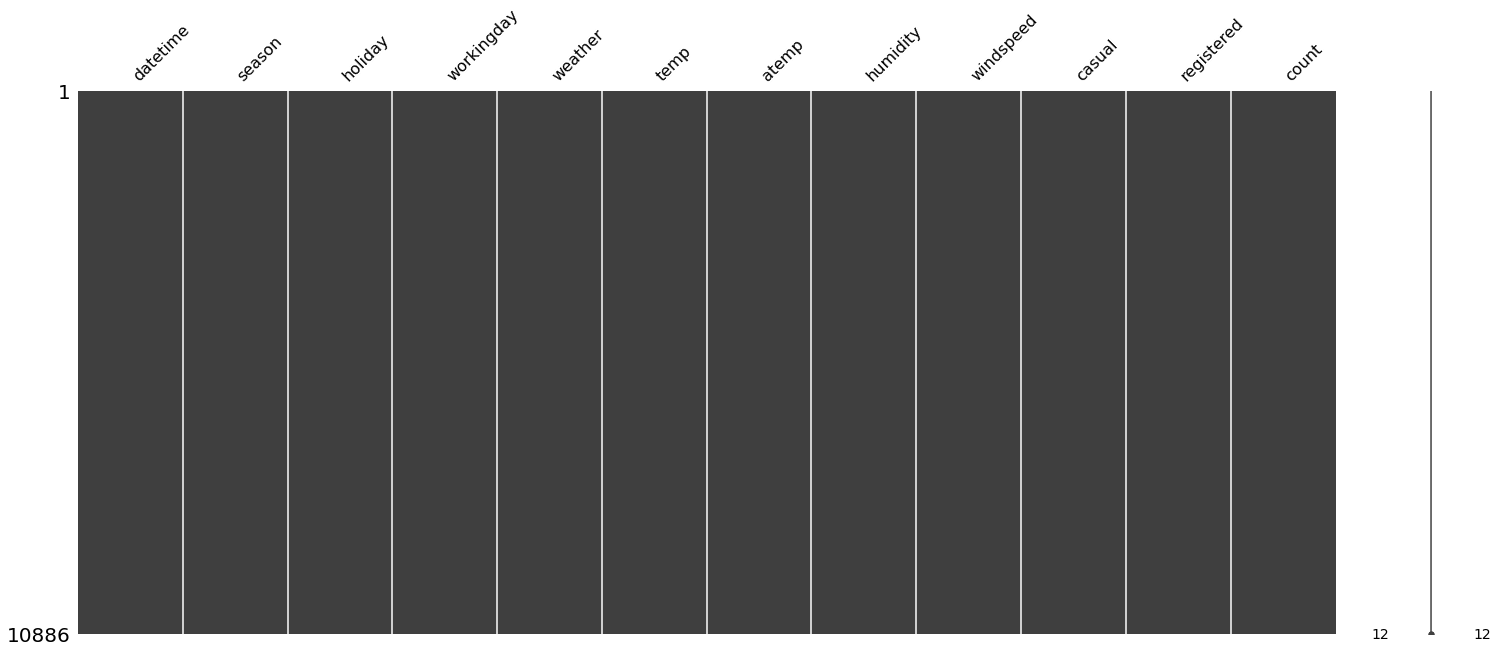

In [69]:
msno.matrix(train_df)

## Feature Engineering

- model 沒辦法直接吃 datetime 格式的資料，所以需要進行拆分。
- datetime
    - date
    - year
    - month
    - weekday（星期幾）
    - hour

In [136]:
train_df['date'] = train_df.datetime.apply(lambda x : x.date())
train_df['year'] = train_df.datetime.apply(lambda x : x.year)
train_df['month'] = train_df.datetime.apply(lambda x : x.month)
train_df['weekday'] = train_df.datetime.apply(lambda x : x.isoweekday())
train_df['hour'] = train_df.datetime.apply(lambda x : x.hour)
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,1,6,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,1,6,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,1,6,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,1,6,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,3,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,3,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,3,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,3,22


# EDA

1. 欄位檢視
2. Count 與各變數交叉分析
    - Count v.s Time
        - month
        - weekday
        - hour
    - Count v.s Season
    - Count v.s Holiday
    - Count v.s Workingday
    - Count v.s Temp
    - Count v.s Atemp
    - Count v.s Humidity
    - Count v.s Windspeed
    - Correlation matrix

## 欄位檢視

### casual / registered / count

- count = casual + registered
    - 75% = 284
    - count > 600 : 412 筆
- 看起來 count 有 outlier。
- 後面跑模型可以比較有無去除 outlier 的差別。

In [157]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,4.013963,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,2.004585,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,2.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,4.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,6.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,7.000000,23.000000


Text(0.5, 0, 'count')

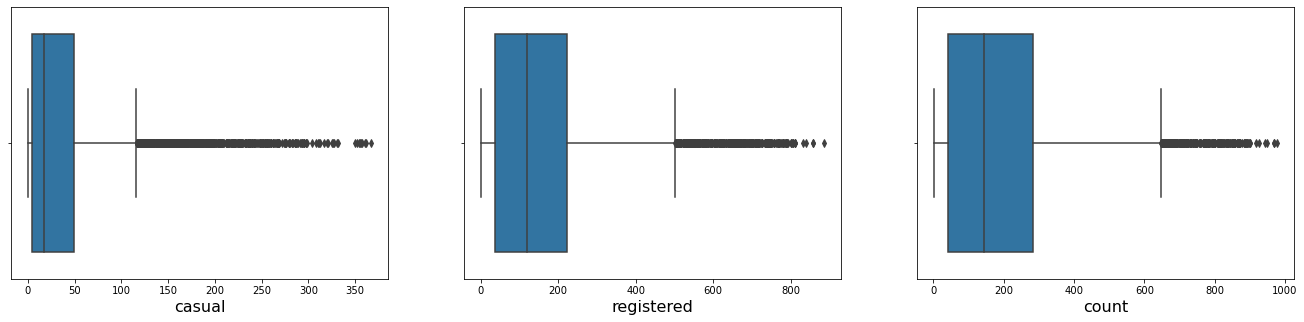

In [196]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(23,5))
# fig.set_size_inches(23,5)

sns.boxplot(data=train_df, x='casual', ax=axes[0])
sns.boxplot(data=train_df, x='registered', ax=axes[1])
sns.boxplot(data=train_df, x='count', ax=axes[2])

axes[0].set_xlabel('casual', fontsize=16)
axes[1].set_xlabel('registered', fontsize=16)
axes[2].set_xlabel('count', fontsize=16)

In [158]:
train_df.query('count > 600').shape[0]

412

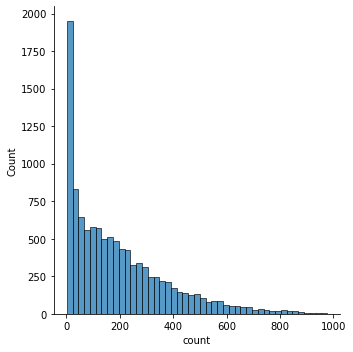

In [143]:
# fig, axes = plt.subplots(ncols=3,nrows=1)
# fig
# axes[0]

# sns.displot(train_df.casual, ax=axes[0])
# sns.displot(train_df.registered, ax=axes[1])
# sns.displot(train_df['count'], ax=axes[2])

# sns.displot(train_df.casual)
# sns.displot(train_df.registered)
sns.displot(train_df['count'])

### 其他欄位

- weather
    - 1 > 2 > 3 >> 4
- windspeed
    - 資料呈現不連續的狀況，且風速為 0 的資料頗多 **--> 推測資料有問題，需進行處理**

In [164]:
display(train_df.season.value_counts())
display(train_df.holiday.value_counts())
display(train_df.workingday.value_counts())
train_df.weather.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

0    10575
1      311
Name: holiday, dtype: int64

1    7412
0    3474
Name: workingday, dtype: int64

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

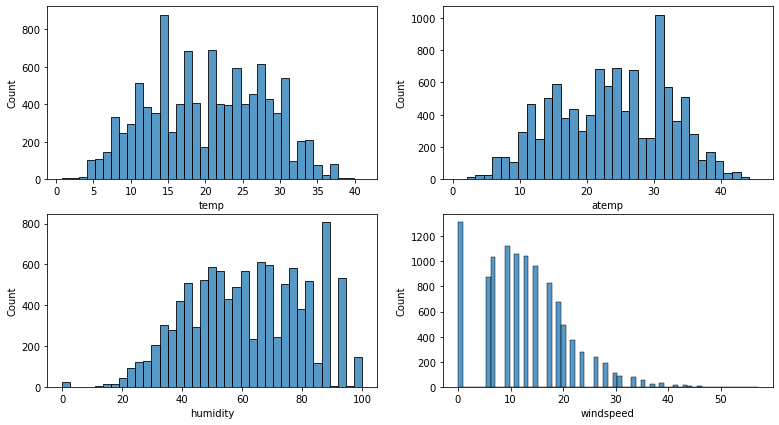

In [191]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13,7))

sns.histplot(data=train_df, x='temp', ax=axes[0][0])
sns.histplot(data=train_df, x='atemp', ax=axes[0][1])
sns.histplot(data=train_df, x='humidity', ax=axes[1][0])
sns.histplot(data=train_df, x='windspeed', ax=axes[1][1])

# sns.distplot(train_df['temp'], ax=axes[0][0])
# sns.distplot(train_df['atemp'], ax=axes[0][1])
# sns.distplot(train_df['humidity'], ax=axes[1][0])
# sns.distplot(train_df['windspeed'], ax=axes[1][1])

# sns.kdeplot(train_df['temp'], ax=axes[0][0])
# sns.kdeplot(train_df['atemp'], ax=axes[0][1])
# sns.kdeplot(train_df['humidity'], ax=axes[1][0])
# sns.kdeplot(train_df['windspeed'], ax=axes[1][1])

#### windspeed 處理

- 以風速不為0的資料，去預測風速為0的資料的真正風速應為多少。

## Count 與各變數交叉分析

- Count v.s Time
    - month
    - weekday
    - hour
- Count v.s Season
- Count v.s Holiday
- Count v.s Workingday
- Count v.s Temp
- Count v.s Atemp
- Count v.s Humidity
- Count v.s Windspeed
- Correlation matrix